In [123]:
import numpy as np
import matplotlib.pyplot as plt

from src.architecture import *
from src.tensor import *
from src.functions import *
from src.optimizer import *
from src.data import *

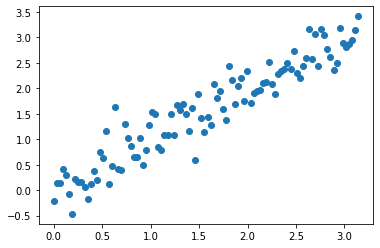

In [129]:
# Generate data
X = [[x] for x in np.linspace(0, np.pi, 100)]
Y = [[np.random.normal(x, 0.3)] for x in X]

Data = [(X[n], Y[n]) for n in range(len(X))]
plt.scatter(X, Y)

In [130]:
# Set Parameters
epochs = 40
lr = 0.01
lrSchedulerStep = 20
batchSize = 4
hiddenLayers = [4,4,1]

# Create model
m = MLP(1, hiddenLayers)

# Create Data Loader
dl = DataLoader(X, Y, batchSize=batchSize, shuffle=True)

In [131]:
# Train
print('Train for {} epochs.'.format(epochs))

for epoch in range(epochs):
    if (epoch+1) % lrSchedulerStep == 0:
        lr *= 0.5

    running_loss = 0
    random.shuffle(Data)

    for batch in dl:
        loss = 0
        for (x, y) in batch:
            pred = m(x)
            loss = loss + mseLoss(pred, y)
        loss = loss * (1/len(batch))

        loss.zero_grad()
        dDict = loss.depthDict()
        loss.backward(dDict)
        sgd(lr, dDict)

        running_loss += loss
        
    print('Epoch: {}, Loss = {}'.format(epoch, running_loss.val/len(X), lr))

Train for 40 epochs.
Epoch: 0, Loss = [0.10887775]
Epoch: 1, Loss = [0.11482573]
Epoch: 2, Loss = [0.0518541]
Epoch: 3, Loss = [0.02809934]
Epoch: 4, Loss = [0.02901299]
Epoch: 5, Loss = [0.02553753]
Epoch: 6, Loss = [0.02739735]
Epoch: 7, Loss = [0.02311028]
Epoch: 8, Loss = [0.02717908]
Epoch: 9, Loss = [0.02545336]
Epoch: 10, Loss = [0.02705309]
Epoch: 11, Loss = [0.0243101]
Epoch: 12, Loss = [0.02342966]
Epoch: 13, Loss = [0.02720022]
Epoch: 14, Loss = [0.02473413]
Epoch: 15, Loss = [0.02439249]
Epoch: 16, Loss = [0.02479971]
Epoch: 17, Loss = [0.02489303]
Epoch: 18, Loss = [0.02385363]
Epoch: 19, Loss = [0.02164168]
Epoch: 20, Loss = [0.02478947]
Epoch: 21, Loss = [0.02430052]
Epoch: 22, Loss = [0.02473154]
Epoch: 23, Loss = [0.02601377]
Epoch: 24, Loss = [0.02360225]
Epoch: 25, Loss = [0.02318544]
Epoch: 26, Loss = [0.02517988]
Epoch: 27, Loss = [0.02421339]
Epoch: 28, Loss = [0.02452114]
Epoch: 29, Loss = [0.02353123]
Epoch: 30, Loss = [0.0235237]
Epoch: 31, Loss = [0.02384]
Epo

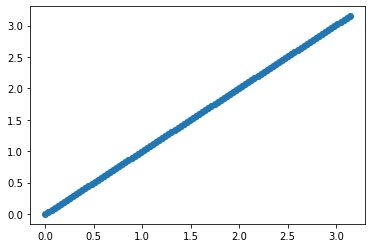

In [132]:
# Test
X_test = [x for x in np.linspace(0, np.pi, 100)]
Y_pred = [m([x])[0].val for x in X_test]

plt.scatter(X_test, Y_pred)